In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import math

In [4]:
#df = pd.read_csv("C:/Users/user/Desktop/OnlineRetailCSV.csv") #https
df = pd.read_csv('C:/Users/user/Desktop/train.csv') #we need data frame of csv data 

In [5]:
df.keys()

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
#df.rename(columns={'24':'wife_age'}, inplace=True)
df.shape

(103904, 25)

In [7]:
df.isnull()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103900,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103901,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103902,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df = df.drop("Unnamed: 0", axis=1)

In [9]:
df = df.drop("id", axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [11]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [12]:
df = df.dropna().copy()

In [13]:
df.shape

(103594, 23)

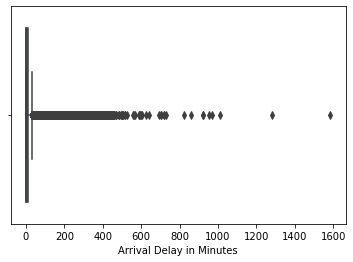

In [14]:
pltforarrival = sns.boxplot(x=df["Arrival Delay in Minutes"])
fig = pltforarrival.get_figure()
fig.savefig("arrival delay boxplot")

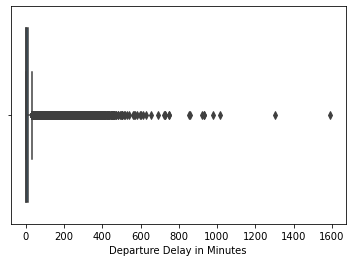

In [15]:
pltfordeparture = sns.boxplot(x=df["Departure Delay in Minutes"])
fig = pltfordeparture.get_figure()
fig.savefig("departure delay boxplot.png")

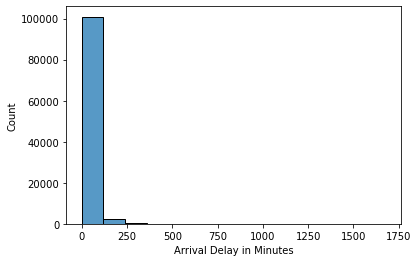

In [16]:
hisforarrival = sns.histplot(x=df["Arrival Delay in Minutes"], binwidth=120)
fig = hisforarrival.get_figure()
fig.savefig("his for arrival.png")

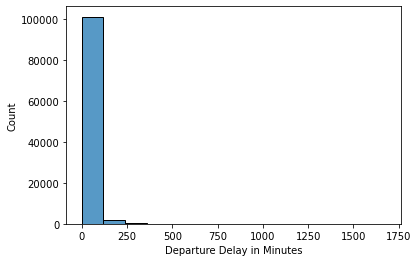

In [17]:
histfordeparture = sns.histplot(x=df["Departure Delay in Minutes"], binwidth=120)
fig = histfordeparture.get_figure()
fig.savefig("is for departure.png")

In [18]:
df.loc[df["Departure Delay in Minutes"] > 1300]
df.loc[df["Arrival Delay in Minutes"] > 1250]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
6744,Male,Loyal Customer,32,Business travel,Business,2916,2,2,2,2,...,3,4,5,4,5,3,5,1305,1280.0,satisfied
83741,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,2,3,...,2,4,4,4,2,3,2,1592,1584.0,neutral or dissatisfied


In [19]:
outliers = df[df['Arrival Delay in Minutes'] > 1250].index
df.drop(outliers, inplace=True)
df.shape

(103592, 23)

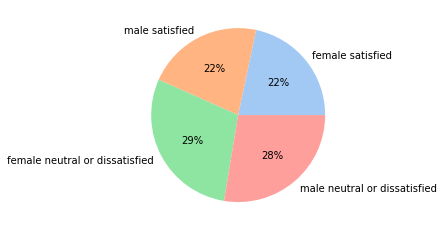

In [20]:
female_satis = df[(df["Gender"] == "Female") & (df["satisfaction"] == "satisfied")].shape[0]
male_satis = df[(df["Gender"] == "Male") & (df["satisfaction"] == "satisfied")].shape[0]
female_not = df[(df["Gender"] == "Female") & (df["satisfaction"] == "neutral or dissatisfied")].shape[0]
male_not = df[(df["Gender"] == "Male") & (df["satisfaction"] == "neutral or dissatisfied")].shape[0]
data = [female_satis, male_satis, female_not, male_not]
labels = ["female satisfied", "male satisfied", "female neutral or dissatisfied", "male neutral or dissatisfied"]

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.savefig("satisfied.png")
plt.show()

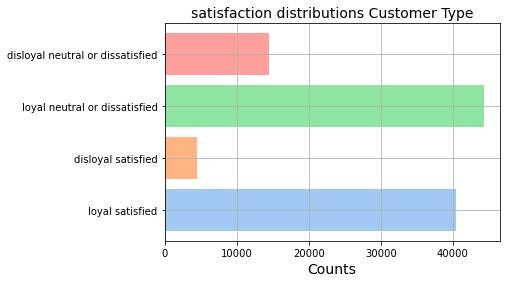

In [21]:
loyal_satisfied = df[(df["Customer Type"] == "Loyal Customer") & (df["satisfaction"] == "satisfied")].shape[0]
disloyal_satisfied = df[(df["Customer Type"] == "disloyal Customer") & (df["satisfaction"] == "satisfied")].shape[0]
loyal_dis = df[(df["Customer Type"] == "Loyal Customer") & (df["satisfaction"] == "neutral or dissatisfied")].shape[0]
disloyal_dis = df[(df["Customer Type"] == "disloyal Customer") & (df["satisfaction"] == "neutral or dissatisfied")].shape[0]

data = [loyal_satisfied, disloyal_satisfied, loyal_dis, disloyal_dis]
labels = ["loyal satisfied", "disloyal satisfied", "loyal neutral or dissatisfied", "disloyal neutral or dissatisfied"]

colors = sns.color_palette('pastel')[0:5]

plt.barh(labels,data, color=colors)
plt.title('satisfaction distributions Customer Type', fontsize=14)
plt.xlabel('Counts', fontsize=14)
plt.grid(True)
plt.savefig('customer_type.png', bbox_inches="tight")
plt.show()

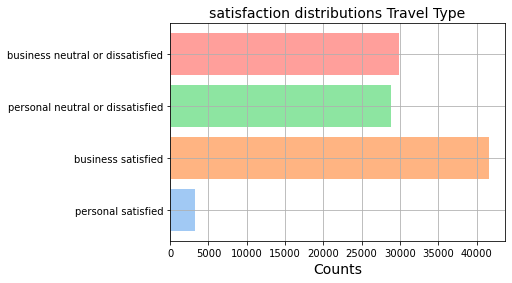

In [22]:
personel_satisfied = df[(df["Type of Travel"] == "Personal Travel") & (df["satisfaction"] == "satisfied")].shape[0]
business_satisfied = df[(df["Type of Travel"] == "Business travel") & (df["satisfaction"] == "satisfied")].shape[0]
personel_dis = df[(df["Type of Travel"] == "Personal Travel") & (df["satisfaction"] == "neutral or dissatisfied")].shape[0]
business_dis = df[(df["Type of Travel"] == "Business travel") & (df["satisfaction"] == "neutral or dissatisfied")].shape[0]

data = [personel_satisfied, business_satisfied, personel_dis, business_dis]
labels = ["personal satisfied", "business satisfied", "personal neutral or dissatisfied", "business neutral or dissatisfied"]

colors = sns.color_palette('pastel')[0:5]

plt.barh(labels,data, color=colors)
plt.title('satisfaction distributions Travel Type', fontsize=14)
plt.xlabel('Counts', fontsize=14)
plt.grid(True)
plt.savefig('customer_type.png', bbox_inches="tight")
plt.show()

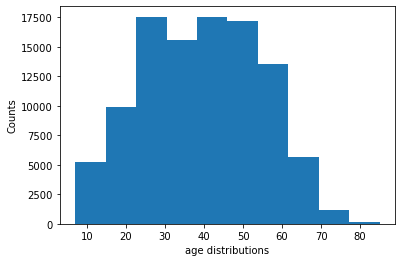

In [23]:
plt.hist(df["Age"])
plt.xlabel("age distributions")
plt.ylabel("Counts")
plt.savefig("age.png")

(array([ 3096.,     0., 17781.,     0., 25753.,     0., 25789.,     0.,
        19737., 11436.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

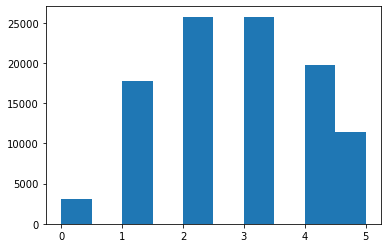

In [24]:
plt.hist(df["Inflight wifi service"])

In [25]:
df_cross = df.copy()

In [26]:
df_cross.shape

(103592, 23)

In [27]:
df_cross["satisfaction"] = pd.get_dummies(df_cross["satisfaction"]) #THIS LINE EXECUTED AGAIN !!! THEN TRY 
df_cross["satisfaction"]                                            #CLASSIFIERS DECISION TREE RANDOM FOREST NAIVE BAYES

0         1
1         1
2         0
3         1
4         0
         ..
103899    1
103900    0
103901    1
103902    1
103903    1
Name: satisfaction, Length: 103592, dtype: uint8

In [28]:
df_cross["Gender"] = pd.get_dummies(df_cross["Gender"])
df_cross["Customer Type"] = pd.get_dummies(df_cross["Customer Type"])
df_cross["Type of Travel"] = pd.get_dummies(df_cross["Type of Travel"])
df_cross["Class"] = pd.get_dummies(df_cross["Class"])
df_cross.dtypes

Gender                                 uint8
Customer Type                          uint8
Age                                    int64
Type of Travel                         uint8
Class                                  uint8
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [29]:
corr = df_cross.corr()
np.fill_diagonal(corr.values, 0)
corr.replace(0, np.nan, inplace=True)

corr

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,NaN,-0.031558,-0.008930,0.006829,-0.010455,-0.006062,-0.008964,-0.008847,-0.007166,-0.000221,...,-0.006064,-0.008019,-0.031835,-0.037333,-0.010415,-0.038937,-0.006417,-0.002632,-0.000467,0.012337
Customer Type,-0.031558,NaN,0.281822,-0.308269,0.085520,0.225359,0.007711,0.207015,0.019632,-0.006290,...,0.110112,0.056369,0.047801,-0.024893,0.032064,-0.023051,0.083757,-0.004738,-0.005150,-0.187559
Age,-0.008930,0.281822,NaN,0.048604,0.139029,0.099848,0.017470,0.038038,0.024462,-0.001562,...,0.076384,0.057123,0.040502,-0.047619,0.035015,-0.049900,0.053505,-0.010336,-0.012353,-0.137051
Type of Travel,0.006829,-0.308269,0.048604,NaN,0.552022,0.267638,0.104876,-0.259839,0.133396,0.030808,...,0.147968,0.056473,0.138682,0.031358,-0.017067,0.022488,0.078747,0.006514,0.006136,-0.448985
Class,-0.010455,0.085520,0.139029,0.552022,NaN,0.467181,0.032777,-0.096812,0.107492,0.004515,...,0.198940,0.220676,0.213399,0.171112,0.162364,0.165850,0.139341,-0.010460,-0.015029,-0.503934
Flight Distance,-0.006062,0.225359,0.099848,0.267638,0.467181,NaN,0.007059,-0.019898,0.065707,0.004745,...,0.128651,0.109534,0.133822,0.063218,0.073203,0.057440,0.093101,0.001387,-0.002984,-0.298903
Inflight wifi service,-0.008964,0.007711,0.017470,0.104876,0.032777,0.007059,NaN,0.343753,0.715846,0.336125,...,0.209508,0.121489,0.160496,0.121064,0.043181,0.110621,0.132656,-0.017292,-0.018956,-0.284168
Departure/Arrival time convenient,-0.008847,0.207015,0.038038,-0.259839,-0.096812,-0.019898,0.343753,NaN,0.437017,0.444599,...,-0.004692,0.068611,0.012473,0.071905,0.093333,0.073220,0.014339,0.001314,-0.000378,0.051717
Ease of Online booking,-0.007166,0.019632,0.024462,0.133396,0.107492,0.065707,0.715846,0.437017,NaN,0.458744,...,0.047178,0.038764,0.107442,0.038855,0.010959,0.035325,0.016194,-0.005982,-0.007703,-0.171511
Gate location,-0.000221,-0.006290,-0.001562,0.030808,0.004515,0.004745,0.336125,0.444599,0.458744,NaN,...,0.003562,-0.028529,-0.005859,0.002423,-0.035441,0.001738,-0.004005,0.005857,0.005449,-0.000458


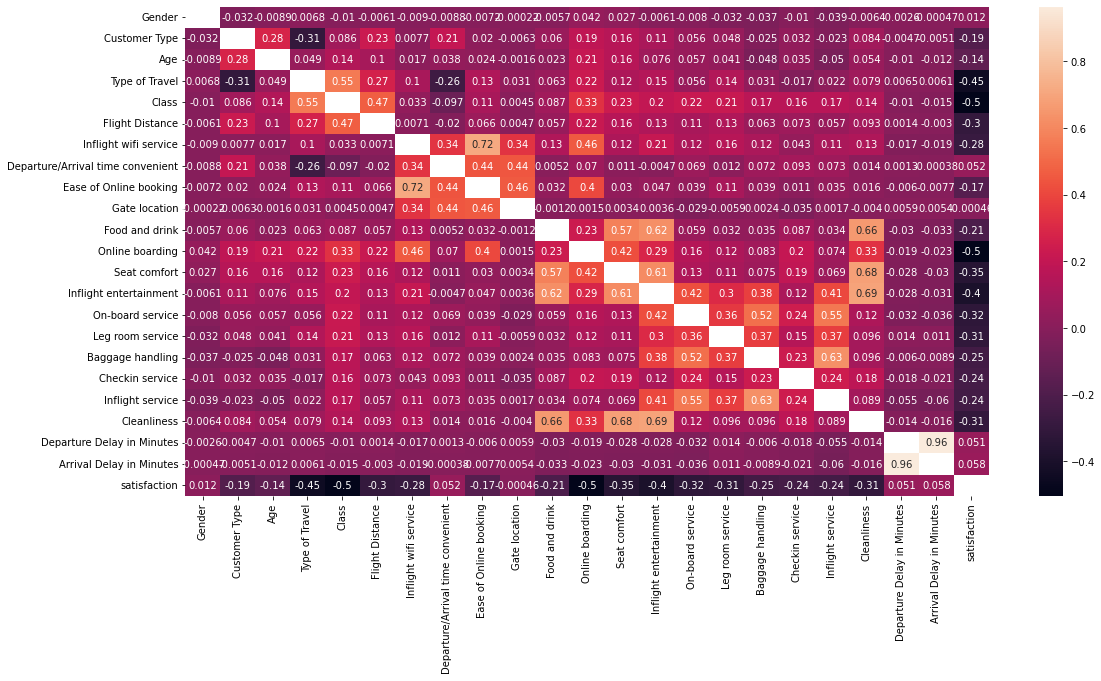

In [30]:
plt.figure(figsize=(18, 9))
figure_sns = sns.heatmap(corr, annot=True)
fig = figure_sns.get_figure()
fig.savefig("corrematris.png")

In [31]:
corr.unstack().sort_values(kind='quicksort', na_position='first').drop_duplicates(keep='first')

Gender                    Gender                             NaN
satisfaction              Class                        -0.503934
Online boarding           satisfaction                 -0.503447
satisfaction              Type of Travel               -0.448985
Inflight entertainment    satisfaction                 -0.398204
                                                          ...   
Food and drink            Cleanliness                   0.657639
Seat comfort              Cleanliness                   0.678470
Inflight entertainment    Cleanliness                   0.691742
Ease of Online booking    Inflight wifi service         0.715846
Arrival Delay in Minutes  Departure Delay in Minutes    0.964538
Length: 254, dtype: float64

In [32]:
df_cross.corr().abs()["satisfaction"].sort_values(ascending=False)

satisfaction                         1.000000
Class                                0.503934
Online boarding                      0.503447
Type of Travel                       0.448985
Inflight entertainment               0.398204
Seat comfort                         0.349098
On-board service                     0.322453
Leg room service                     0.313179
Cleanliness                          0.305034
Flight Distance                      0.298903
Inflight wifi service                0.284168
Baggage handling                     0.247821
Inflight service                     0.244857
Checkin service                      0.235897
Food and drink                       0.209641
Customer Type                        0.187559
Ease of Online booking               0.171511
Age                                  0.137051
Arrival Delay in Minutes             0.058370
Departure/Arrival time convenient    0.051717
Departure Delay in Minutes           0.051252
Gender                            

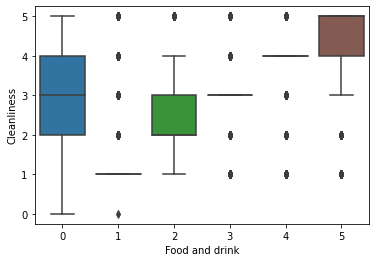

In [33]:
figure_sns = sns.boxplot(x="Food and drink", y="Cleanliness", data=df_cross)
fig = figure_sns.get_figure()
fig.savefig("fooddrink.png")

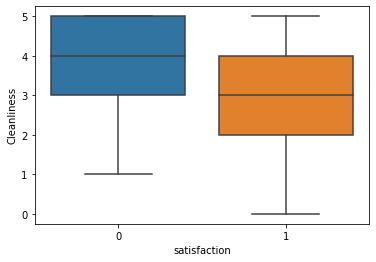

In [34]:
figure_sns = sns.boxplot(x='satisfaction', y='Cleanliness', data=df_cross)
fig = figure_sns.get_figure()
fig.savefig("cleansatis.png")

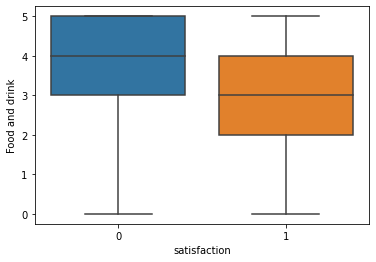

In [35]:
figure_sns = sns.boxplot(x='satisfaction', y='Food and drink', data=df_cross)
fig = figure_sns.get_figure()
fig.savefig("foodsatis.png")

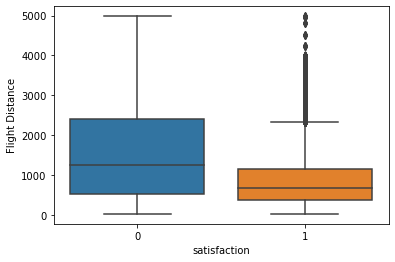

In [36]:
figure_sns = sns.boxplot(x='satisfaction', y='Flight Distance', data=df_cross)
fig = figure_sns.get_figure()
fig.savefig("class.png")

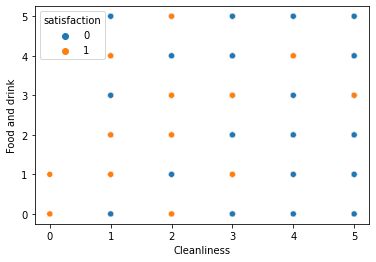

In [37]:
figure_sns = sns.scatterplot(x="Cleanliness", y="Food and drink", hue="satisfaction", data=df_cross)
fig = figure_sns.get_figure()
fig.savefig("plotfood.png")

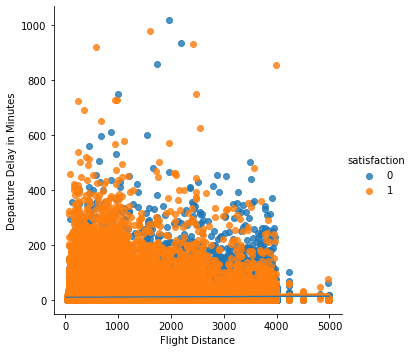

In [38]:
sns.lmplot(x='Flight Distance', y='Departure Delay in Minutes', hue='satisfaction', data=df_cross)

In [39]:
#sns.lmplot(x='Flight Distance')
df.head()
df.shape

(103592, 23)

In [40]:
df["satisfaction"].value_counts()

neutral or dissatisfied    58696
satisfied                  44896
Name: satisfaction, dtype: int64

In [41]:
#Info(D) calculate 
df["Class"].value_counts()

Business    49532
Eco         46592
Eco Plus     7468
Name: Class, dtype: int64

In [42]:
#info for business 
print(df[(df["Class"] == "Business") & (df["satisfaction"] == "neutral or dissatisfied")].shape[0])

15143


In [43]:
print(df[(df["Class"] == "Business") & (df["satisfaction"] == "satisfied")].shape[0])

34389


In [44]:
#print((df[df["Class"]])

In [45]:
def pandas_entropy(name, spike, number):
    nega = df[(df[name] == spike) & (df["satisfaction"] == "neutral or dissatisfied")].shape[0]
    posi = df[(df[name] == spike) & (df["satisfaction"] == "satisfied")].shape[0]
    pnnega = (nega/number)
    pposi = (posi/number)
    lognega = pnnega*(math.log2(pnnega))
    logpos = pposi*(math.log2(pposi))
    entropy = lognega + logpos
    return -(entropy)

In [46]:
def entropy_list(column):
    for i in range(1, 6):
        temp = df[df[column] == i].shape[0]
        en = pandas_entropy(column, i, temp)
        print(str(i) + ":" + str(en))  

In [47]:
entropy_list("On-board service")

1:0.7089984285771682
2:0.820250989439975
3:0.8995709282944693
4:0.996032560357984
5:0.9406859150202522


In [48]:
print(str(pandas_entropy("Class", "Business", 49532)))

0.88817283818168


In [49]:
print(pandas_entropy("Class", "Eco", 46592))

0.6932517472668389


In [50]:
print(pandas_entropy("Class", "Eco Plus", 7468))

0.804632336131798


In [51]:
nu = (49532/103592)
nu_1 = nu*(pandas_entropy("Class", "Business", 49532))

nu_2 = (46592/103592)
nu_3 = nu_2*(pandas_entropy("Class","Eco", 46592))

nu_4 = (7468/103592)
nu_5 = nu_4*(pandas_entropy("Class", "Eco Plus", 7468))

info_class = (nu_1 + nu_3 + nu_5)
gain = (0.987 - info_class)

print(str(gain))

0.19251821843671524


In [52]:
df["Type of Travel"].value_counts()

Business travel    71464
Personal Travel    32128
Name: Type of Travel, dtype: int64

In [53]:
print(pandas_entropy("Type of Travel", "Personal Travel", 32128))

0.4739291234809583


In [54]:
print(pandas_entropy("Type of Travel", "Business travel", 71464))

0.9802361063738505


In [55]:
nu = (32128/103592)
nu_1 = nu*(pandas_entropy("Type of Travel", "Personal Travel", 32128))

nu_2 = (71464/103592)
nu_3 = nu_2*(pandas_entropy("Type of Travel", "Business travel", 71464))

info_class = (nu_1 + nu_3)
gain = (0.987 - info_class)

print(str(gain))

0.16378982947431198


In [56]:
df["Customer Type"].value_counts() 

Loyal Customer       84660
disloyal Customer    18932
Name: Customer Type, dtype: int64

In [57]:
nu = (84660/103592)
nu_1 = nu*(pandas_entropy("Customer Type", "Loyal Customer", 84660))

nu_2 = (18932/103592)
nu_3 = nu_2*(pandas_entropy("Customer Type", "disloyal Customer", 18932))

info_class = (nu_1 + nu_3)
gain = (0.987 - info_class)

print(str(gain))

0.026633475519677874


In [58]:
df["Gender"].value_counts()

Female    52575
Male      51017
Name: Gender, dtype: int64

In [59]:
nu_5 = (52575/103592)
nu_5 = nu_5*(pandas_entropy("Gender", "Female", 52575))

nu_7 = (51017/103592)
nu_8 = nu_7*(pandas_entropy("Gender", "Male", 51017))

info_class = (nu_5 + nu_8)
gain = (0.987 - info_class)

print(str(gain)) #negative ??

-5.089394003621184e-05


In [60]:
df["On-board service"].value_counts()
#df[df["On-board service"] == 2].shape[0]

4    30771
5    23584
3    22770
2    14632
1    11832
0        3
Name: On-board service, dtype: int64

In [61]:
def calculate_entropy(name_2):
    total = 0
    name = name_2
    for i in range(1, 6):
        temp = df[(df[name] == i)].shape[0]
        nu = (temp/103592)
        nu_2 = nu*(pandas_entropy(name, i, temp))
        total += nu_2
        
    gain = (0.987 - total)
    print(str(gain))

In [62]:
calculate_entropy("On-board service")

0.08241213166760952


In [63]:
calculate_entropy("Leg room service")

0.09176804426946983


In [64]:
calculate_entropy("Cleanliness")

0.07452238205258077


In [65]:
calculate_entropy("Inflight entertainment")

0.13521682355489606


In [66]:
calculate_entropy("Seat comfort")

0.1134502894118361


In [67]:
calculate_entropy("Ease of Online booking")

0.11288356402516897


In [68]:
calculate_entropy("Online boarding")

0.3270811511378412


In [69]:
calculate_entropy("Inflight wifi service")

0.23387993793944561


In [70]:
calculate_entropy("Checkin service")

0.04580195464829073


In [71]:
calculate_entropy("Gate location")

0.0172180228053167


In [72]:
calculate_entropy("Food and drink")

0.03861653134765164


In [73]:
calculate_entropy("Departure/Arrival time convenient")

0.053956987654420474


In [74]:
mean = df["Age"].mean()
number = df[(df["Age"] < mean)].shape[0]
print(number)
number_2 = df[(df["Age"] > mean)].shape[0]
print(number_2)

51226
52366


In [75]:
def pandas_entropy_less(name, mean, number):
    nega = df[(df[name] < mean) & (df["satisfaction"] == "neutral or dissatisfied")].shape[0]
    posi = df[(df[name] < mean) & (df["satisfaction"] == "satisfied")].shape[0]
    pnnega = (nega/number)
    pposi = (posi/number)
    lognega = pnnega*(math.log2(pnnega))
    logpos = pposi*(math.log2(pposi))
    entropy = lognega + logpos
    return -(entropy)

In [76]:
def pandas_entropy_more(name, mean, number):
    nega = df[(df[name] > mean) & (df["satisfaction"] == "neutral or dissatisfied")].shape[0]
    posi = df[(df[name] > mean) & (df["satisfaction"] == "satisfied")].shape[0]
    pnnega = (nega/number)
    pposi = (posi/number)
    lognega = pnnega*(math.log2(pnnega))
    logpos = pposi*(math.log2(pposi))
    entropy = lognega + logpos
    return -(entropy)

In [77]:
nu = (number/103592)
nu_1 = nu*(pandas_entropy_less("Age", df["Age"].mean(), number))

nu_2 = (number_2/103592)
nu_3 = nu_2*(pandas_entropy_more("Age", df["Age"].mean(), number_2))

info_class = (nu_1 + nu_3)
gain = (0.987 - info_class)

print(gain)

0.022758199866133588


In [78]:
df["satisfaction"]

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103592, dtype: object

In [79]:
df_cross = df_cross.drop('Gate location', axis=1)
df_cross = df_cross.drop('Gender', axis=1)
df_cross = df_cross.drop('Food and drink', axis=1)
#df_cross = df_cross.drop('Customer Type', axis=1)
df_cross = df_cross.drop('Departure/Arrival time convenient', axis=1)
df_cross = df_cross.drop('Age', axis=1)

In [80]:
df_cross.dtypes

Customer Type                   uint8
Type of Travel                  uint8
Class                           uint8
Flight Distance                 int64
Inflight wifi service           int64
Ease of Online booking          int64
Online boarding                 int64
Seat comfort                    int64
Inflight entertainment          int64
On-board service                int64
Leg room service                int64
Baggage handling                int64
Checkin service                 int64
Inflight service                int64
Cleanliness                     int64
Departure Delay in Minutes      int64
Arrival Delay in Minutes      float64
satisfaction                    uint8
dtype: object

In [81]:
df_cross["satisfaction"] #WE HAVE TO RUN THIS LINE AGAIN FOR 0 0 beginning instead of 1 1 !!

0         1
1         1
2         0
3         1
4         0
         ..
103899    1
103900    0
103901    1
103902    1
103903    1
Name: satisfaction, Length: 103592, dtype: uint8

In [82]:
X = df_cross.drop('satisfaction', axis=1)
y = df_cross['satisfaction']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [84]:
models = {'Decision Tree' : DecisionTreeClassifier(), 'Random Forest Classification': RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
    
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [85]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores #accuracy score

{'Decision Tree': 0.944076195379368,
 'Random Forest Classification': 0.9589420168608018}

In [86]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pre = model.predict(X_test) #predictions

<AxesSubplot:>

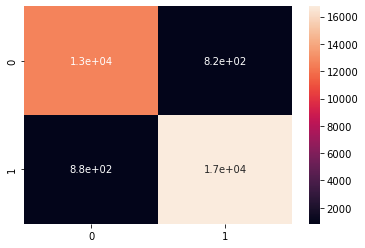

In [87]:
conf2 = confusion_matrix(y_test, y_pre)
sns.heatmap(conf2, annot=True)

In [88]:
print(recall_score(y_test, y_pre)) #recall score predictions  

0.9503658744114811


In [89]:
print(precision_score(y_test, y_pre)) #precision score hatalı olabilir ???

0.9530690027874168


In [90]:
print(f1_score(y_test, y_pre))

0.9517155192001818


In [91]:
#random forest classifier 
model = RandomForestClassifier()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

#print(rec)

print(recall_score(y_test, predictions))

0.973055760394804


<AxesSubplot:>

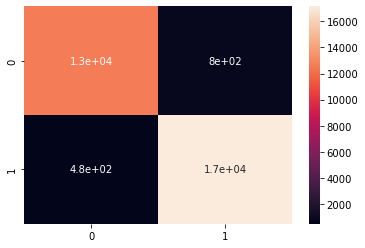

In [92]:
conf2 = confusion_matrix(y_test, predictions)
sns.heatmap(conf2, annot=True)

In [93]:
print(f1_score(y_test, predictions))

0.9642766800640828


In [94]:
print(precision_score(y_test, predictions))

0.9556545961002786


In [95]:
#logistic regression 
min_max_scaler = MinMaxScaler()
X_train_min_max = min_max_scaler.fit_transform(X_train) #scale the data between [0,1] range
#scaler = StandardScaler().fit(X_train)
#X_scaled = scaler.transform(X_train)

logreg  = LogisticRegression()
logreg.fit(X_train_min_max, y_train)

y_predictions = logreg.predict(X_test)

In [96]:
print("Accuracy:", accuracy_score(y_test, y_predictions))
print("Precision:", precision_score(y_test, y_predictions))
print("Recall:", recall_score(y_test, y_predictions))
print("f1 score:", f1_score(y_test, y_predictions))

Accuracy: 0.5706930947937447
Precision: 0.576698751207643
Recall: 0.9142322309830393
f1 score: 0.707258206073372


In [97]:
def gini_calculate(name, rate):
        name_number = df[(df[name] == rate)].shape[0] #number of name
        if(name_number != 0):
            nega_number = df[(df[name] == rate) & (df["satisfaction"] == "neural or dissatisfied")].shape[0]
            posi_number = df[(df[name] == rate) & (df["satisfaction"] == "satisfied")].shape[0]
            
            div_nega = (nega_number/name_number)
            div_posi = (posi_number/name_number)
            
            total = (div_nega)**2 + (div_posi)**2
            
            gini = (1 - total)
            
            return gini 
        else:
            return 0

In [98]:
def gini_Index(name):
    total_number = df[name].shape[0]
    total = 0
    for i in range(1, 6):
        number_of_rate = df[(df[name] == i)].shape[0]
        div_total = (number_of_rate/total_number)
        gini = gini_calculate(name, i)
        mul = gini*div_total
        total += mul
    return total 

In [99]:
def gini_list(name):
    print(name + " " + str(gini_Index(name)))

In [100]:
array = ["Inflight wifi service", "Ease of Online booking", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness"]

for i in array:
    gini_list(i)

Inflight wifi service 0.744202863889014
Ease of Online booking 0.7634802016767109
Online boarding 0.7021316719070184
Seat comfort 0.7749832890888309
Inflight entertainment 0.7682384179509604
On-board service 0.7849283923256223
Leg room service 0.779178742825954
Baggage handling 0.7918039733210566
Checkin service 0.7970157383411784
Inflight service 0.7925531122834595
Cleanliness 0.787868274104458


In [101]:
#dropping checkin service and inflight service from top highest gini Index multiway splitting
#cleanliness has good linear relationship with satisfaction we can not drop that 
#drop ease of online booking #just drop checkin service
#df_cross = df_cross.drop("Checkin service", axis=1)
#df_cross = df_cross.drop("Inflight service", axis=1)
df_cross = df_cross.drop("Checkin service", axis=1)

In [102]:
df_cross.shape

(103592, 17)

In [103]:
X = df_cross.drop('satisfaction', axis=1)
y = df_cross['satisfaction']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [105]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
    
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [106]:
models = { 'Random Forest Classification': RandomForestClassifier() }
model_scores = fit_and_score(models=models, 
                             X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'Random Forest Classification': 0.9576871098526288}

In [107]:
ran = RandomForestClassifier()
ran.fit(X_train, y_train)
y_pre = ran.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pre))
print("Precision:", precision_score(y_test, y_pre))
print("Recall:", recall_score(y_test, y_pre))
print("f1 score:", f1_score(y_test, y_pre))

Accuracy: 0.9570113906943819
Precision: 0.9536670936125188
Recall: 0.9714107436610131
f1 score: 0.9624571460686787


In [108]:
#this is additional experiment not classification method
min_max_scaler = MinMaxScaler()
X_train_min_max = min_max_scaler.fit_transform(X_train) #scale the data between [0,1] range
scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

logreg  = LogisticRegression()
logreg.fit(X_scaled, y_train)

y_predictions = logreg.predict(X_test)
#once we use X_train_min_max instead of X_scaled and results are different and report include these report 
#but one time X_train_min_max is broken we had to use X_scaled and results are different from X_train_min_max 

In [109]:
print("Accuracy:", accuracy_score(y_test, y_predictions))
print("Precision:", precision_score(y_test, y_predictions))
print("Recall:", recall_score(y_test, y_predictions))
print("f1 score:", f1_score(y_test, y_predictions))

Accuracy: 0.5209472939056567
Precision: 0.5633405740167307
Recall: 0.6914175506268081
f1 score: 0.6208424591249427


<AxesSubplot:>

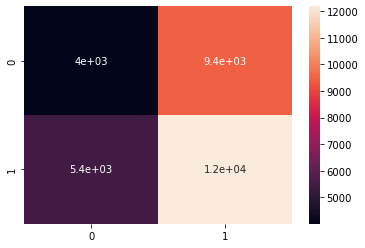

In [110]:
conf2 = confusion_matrix(y_test, y_predictions)
sns.heatmap(conf2, annot=True)

In [111]:
models = { 'GaussianNB': GaussianNB() }
model_scores = fit_and_score(models=models, 
                             X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'GaussianNB': 0.8662076066670957}

In [112]:
mean_fly = df_cross["Flight Distance"].mean() #we binned our values according to mean value

flight_distance=pd.cut(df_cross["Flight Distance"],
                            bins=[0, mean_fly, 5000],
                            labels=["<=1189", ">=1189"])
df_cross.insert(5, "flight_distance", flight_distance)

In [113]:
df_cross.head()

,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,flight_distance,Ease of Online booking,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,0,460,3,<=1189,3,3,5,5,4,3,4,5,5,25,18.0,1
1,0,1,1,235,3,<=1189,3,3,1,1,1,5,3,4,1,1,6.0,1
2,1,1,1,1142,2,<=1189,2,5,5,5,4,3,4,4,5,0,0.0,0
3,1,1,1,562,2,<=1189,5,2,2,2,2,5,3,4,2,11,9.0,1
4,1,1,1,214,3,<=1189,3,5,5,3,3,4,4,3,3,0,0.0,0


In [114]:
df_cross = df_cross.drop("Flight Distance", axis=1)

In [115]:
df_cross.head() #dissatisfaction is zero 

,Customer Type,Type of Travel,Class,Inflight wifi service,flight_distance,Ease of Online booking,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,0,3,<=1189,3,3,5,5,4,3,4,5,5,25,18.0,1
1,0,1,1,3,<=1189,3,3,1,1,1,5,3,4,1,1,6.0,1
2,1,1,1,2,<=1189,2,5,5,5,4,3,4,4,5,0,0.0,0
3,1,1,1,2,<=1189,5,2,2,2,2,5,3,4,2,11,9.0,1
4,1,1,1,3,<=1189,3,5,5,3,3,4,4,3,3,0,0.0,0


In [116]:
df_cross["flight_distance"] = pd.get_dummies(df_cross["flight_distance"])

In [117]:
X = df_cross.drop('satisfaction', axis=1)
y = df_cross['satisfaction']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [119]:
models = { 'GaussianNB': GaussianNB() }
model_scores = fit_and_score(models=models, 
                             X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'GaussianNB': 0.8676555762919107}

In [120]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_pre = gnb.predict(X_test)

<AxesSubplot:>

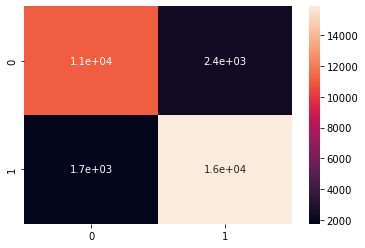

In [121]:
conf2 = confusion_matrix(y_test, gnb_pre)
sns.heatmap(conf2, annot=True)

In [122]:
print("Accuracy:", accuracy_score(y_test, gnb_pre))
print("Precision:", precision_score(y_test, gnb_pre))
print("Recall:", recall_score(y_test, gnb_pre))
print("f1 score:", f1_score(y_test, gnb_pre))

Accuracy: 0.8676555762919107
Precision: 0.8704231528173646
Recall: 0.9007884735379205
f1 score: 0.8853455244891701
